## Bloc 1 : Imports et chargement du fichier CSV

**Description :**  
Dans ce bloc, nous chargeons le fichier `patient_features.csv` dans un DataFrame `df` et affichons un aperçu rapide :
- Aperçu des 5 premières lignes pour vérifier les noms de colonnes et le contenu.
- Dimensions du DataFrame (nombre de lignes et colonnes).
- Informations sur les types de données (chaque colonne).
- Comptage des valeurs manquantes (NaN) par colonne.

In [9]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) IMPORT DES LIBRAIRIES
# ───────────────────────────────────────────────────────────────────────────────

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# (optionnel) pour voir les DataFrame plus joliment dans un notebook
from IPython.display import display

# ───────────────────────────────────────────────────────────────────────────────
# 2) CHARGEMENT DU CSV
# ───────────────────────────────────────────────────────────────────────────────

# Remplace le chemin si besoin ; sous Kaggle/Colab, cela devrait être "/mnt/data/patient_features.csv"
chemin_csv = "Acoustic Therapies for Tinnitus Treatment An EEG Database\Acoustic Therapies for Tinnitus Treatment An EEG Database\processed\patient_features.csv"
df = pd.read_csv(chemin_csv)

# ───────────────────────────────────────────────────────────────────────────────
# 3) APERÇU GÉNÉRAL
# ───────────────────────────────────────────────────────────────────────────────

# 3.1. Afficher les 5 premières lignes
display(df.head())

# 3.2. Taille du DataFrame (nombre de lignes × colonnes)
print("Shape :", df.shape)

# 3.3. Types de données et information générale
print("\nInfo sur le DataFrame :")
print(df.info())

# 3.4. Comptage de valeurs manquantes par colonne
print("\nValeurs manquantes (NaN) par colonne :")
print(df.isna().sum())


<>:19: SyntaxWarning: invalid escape sequence '\A'
<>:19: SyntaxWarning: invalid escape sequence '\A'
C:\Users\melon\AppData\Local\Temp\ipykernel_28916\3705967437.py:19: SyntaxWarning: invalid escape sequence '\A'
  chemin_csv = "Acoustic Therapies for Tinnitus Treatment An EEG Database\Acoustic Therapies for Tinnitus Treatment An EEG Database\processed\patient_features.csv"


,patient,group,code,therapy,session,# EEG,Group,patient_code,Procedence,Age,...,delta_asym_C3_C4,theta_asym_C3_C4,alpha_asym_C3_C4,beta_asym_C3_C4,gamma_asym_C3_C4,delta_asym_P7_P8,theta_asym_P7_P8,alpha_asym_P7_P8,beta_asym_P7_P8,gamma_asym_P7_P8
0,P10,G1,P10G1,G1-Placebo,S2,10,1,P10G1,INR,2.0,...,2.511385e-12,2.872728e-13,-1.280737e-12,-1.449520e-13,4.102335e-14,2.438016e-11,1.909913e-12,1.241352e-13,2.824299e-13,1.782658e-13
1,P10,G2,P10G2,G2-BBT,S2,10,2,P10G2,INR,2.0,...,2.390991e-09,5.105383e-11,1.205252e-11,1.122327e-12,7.001170e-14,7.573613e-09,1.228686e-10,1.560668e-11,1.394889e-12,6.782811e-14
2,P10,G3,P10G3,G3-TRT,S2,10,3,P10G3,INR,2.0,...,-3.220457e-13,-1.113027e-13,-1.695979e-12,-3.355467e-13,5.131422e-15,3.793723e-09,9.097053e-11,1.165250e-11,3.251135e-13,-1.258410e-14
3,P10,G4,P10G4,G4-EAE,S2,10,4,P10G4,INR,3.0,...,-4.211716e-12,-5.792226e-13,-9.337673e-13,-1.273474e-13,-8.715820e-15,-3.105902e-12,-6.768166e-13,-1.132065e-12,-1.657275e-13,-5.203643e-14
4,P10,G5,P10G5,G5-ADT,S2,10,5,P10G5,MTY,3.0,...,-1.650206e-12,1.885600e-15,-3.160980e-13,-1.892990e-13,-5.891511e-14,-1.554524e-10,-5.950295e-11,-3.262700e-11,-1.174675e-11,-7.039680e-12


Shape : (89, 135)

Info sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 135 entries, patient to gamma_asym_P7_P8
dtypes: float64(101), int64(15), object(19)
memory usage: 94.0+ KB
None

Valeurs manquantes (NaN) par colonne :
patient             0
group               0
code                0
therapy             0
session             0
                   ..
delta_asym_P7_P8    0
theta_asym_P7_P8    0
alpha_asym_P7_P8    0
beta_asym_P7_P8     0
gamma_asym_P7_P8    0
Length: 135, dtype: int64


## Bloc 2 : Exploration des noms de colonnes et identification des variables cliniques

Nous examinons ici la liste complète des colonnes du DataFrame pour repérer les variables cliniques (âge, sexe, scores THI, HAD-S/A, HL-D/I, etc.) ainsi que les colonnes catégorielles (patient, group, therapy, session). Cela nous permettra de distinguer clairement :
- Les colonnes cliniques à analyser ensuite (âge, sexe, THI initial, THI effect, HAD, HL, etc.).
- Les colonnes EEG (band-powers et asymétries) qui commenceront par `delta_`, `theta_`, `alpha_`, `beta_` ou `gamma_`.
- Les colonnes de métadonnées à conserver en l’état (`patient`, `group`, `therapy`, `session`, etc.).
- Les variables catégorielles pour lesquelles il faudra éventuellement vérifier les modalités (`therapy`, `session`, …).

Nombre total de colonnes : 135
000  patient
001  group
002  code
003  therapy
004  session
005  # EEG
006  Group
007  patient_code
008  Procedence
009  Age
010  Sex
011  TINNITUS|Laterality
012  TINNITUS|Frequency [Hz]
013  TINNITUS|Intensity  [dB]
014  BPM
015  HL-D
016  HL-I
017  HAD-S S2
018  HAD-S S3
019  HAD-S S4
020  HAD-S Effect
021  HAD-A S2
022  HAD-A S3
023  HAD-A S4
024  HAD-A Effect
025  THI|S2
026  THI|S3
027  THI|S4
028  THI Effect
029  Session 1|Baseline
030  Session 1|Therapy
031  Session 1|Passive
032  Session 2|Passive
033  Session 2|Active
034  Session 3|Passive
035  Session 3|Active
036  Session 4|Baseline
037  Session 4|Therapy
038  Session 4|Passive
039  Session 4|Active
040  delta_bp_FP1
041  delta_bp_FP2
042  delta_bp_F7
043  delta_bp_F3
044  delta_bp_Fz
045  delta_bp_F4
046  delta_bp_F8
047  delta_bp_T7
048  delta_bp_C3
049  delta_bp_C4
050  delta_bp_T8
051  delta_bp_P7
052  delta_bp_Pz
053  delta_bp_P8
054  delta_bp_O1
055  delta_bp_O2
056  theta_bp_FP1
057  t

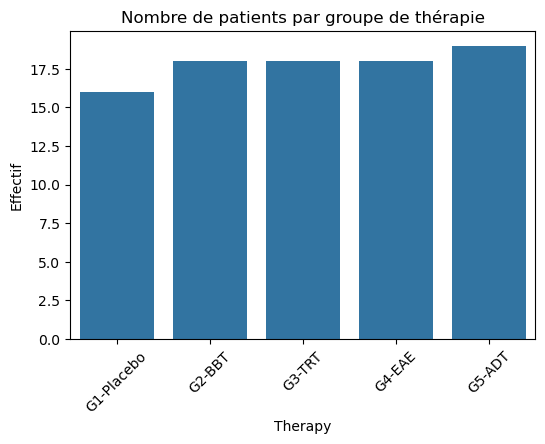


Colonnes candidates pour variables cliniques :
 - Age
 - Sex
 - HL-D
 - HL-I
 - HAD-S S2
 - HAD-S S3
 - HAD-S S4
 - HAD-S Effect
 - HAD-A S2
 - HAD-A S3
 - HAD-A S4
 - HAD-A Effect
 - THI|S2
 - THI|S3
 - THI|S4
 - THI Effect

Types des colonnes cliniques repérées :
Age             float64
Sex              object
HL-D              int64
HL-I            float64
HAD-S S2         object
HAD-S S3         object
HAD-S S4         object
HAD-S Effect    float64
HAD-A S2         object
HAD-A S3         object
HAD-A S4         object
HAD-A Effect    float64
THI|S2           object
THI|S3           object
THI|S4           object
THI Effect      float64
dtype: object


In [10]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) AFFICHAGE DE LA LISTE DES COLONNES
# ───────────────────────────────────────────────────────────────────────────────

# Afficher la liste brute des noms de colonnes
colonnes = df.columns.tolist()
print("Nombre total de colonnes :", len(colonnes))
for i, col in enumerate(colonnes):
    print(f"{i:03d}  {col}")

# ───────────────────────────────────────────────────────────────────────────────
# 2) EXAMEN DES VARIABLES CATÉGORIELLES
# ───────────────────────────────────────────────────────────────────────────────

# Afficher les modalités de 'therapy' et de 'session'
print("\nModalités de la colonne 'therapy' :", df["therapy"].unique())
print("Modalités de la colonne 'session' :", df["session"].unique())

# Visualiser la distribution de 'therapy'
plt.figure(figsize=(6,4))
sns.countplot(x="therapy", data=df, order=sorted(df["therapy"].unique()))
plt.title("Nombre de patients par groupe de thérapie")
plt.xlabel("Therapy")
plt.ylabel("Effectif")
plt.xticks(rotation=45)
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 3) IDENTIFICATION RAPIDE DES COLONNES CLINIQUES
# ───────────────────────────────────────────────────────────────────────────────

# Exemple : lister les colonnes contenant des mots-clés "Age", "Sex", "THI", "HAD", "HL"
mots_cles_cliniques = ["Age", "Sex", "THI", "HAD", "HL"]
colonnes_cliniques = [col for col in colonnes if any(mc in col for mc in mots_cles_cliniques)]
print("\nColonnes candidates pour variables cliniques :")
for col in colonnes_cliniques:
    print(" -", col)

# ───────────────────────────────────────────────────────────────────────────────
# 4) CONFIRMATION DES TYPES D’ÉTATS (OBJECT VS NUMÉRIQUE)
# ───────────────────────────────────────────────────────────────────────────────

# Afficher les types pour ces colonnes cliniques
print("\nTypes des colonnes cliniques repérées :")
print(df[colonnes_cliniques].dtypes)

## Bloc 3 : Nettoyage et conversion des variables cliniques

Dans ce bloc, nous allons convertir les colonnes cliniques identifiées au format `object` en types numériques (`float64` ou `int64`). Ensuite, nous créerons des colonnes “consolidées” pour chaque score clinique (THI, HAD-S, HAD-A) en fonction de la valeur de la colonne `session`. Enfin, nous recoderons la variable `Sex` pour en faire une variable catégorielle propre.

Étapes détaillées :
1. Convertir en numérique (avec `pd.to_numeric`) les colonnes `HAD-S S2/S3/S4`, `HAD-A S2/S3/S4`, `THI|S2/S3/S4`.  
2. Créer des colonnes unifiées :
   - `THI_baseline` = la valeur de `THI|X` correspondant à `session == "X"`.  
   - `HAD_S` = la valeur de `HAD-S SX` correspondant à `session == "SX"`.  
   - `HAD_A` = la valeur de `HAD-A SX` correspondant à `session == "SX"`.  
3. Recoder `Sex` en binaire (`0` pour “M”, `1` pour “F”), ou en `category`.  
4. Vérifier qu’il ne reste plus de valeurs manquantes dans ces nouvelles variables cliniques d’intérêt.

In [11]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) CONVERSION DES COLONNES CLINIQUES EN NUMÉRIQUE
# ───────────────────────────────────────────────────────────────────────────────

# Liste des colonnes à convertir (convertibles en float)
colonnes_to_numeric = [
    "HAD-S S2", "HAD-S S3", "HAD-S S4",
    "HAD-A S2", "HAD-A S3", "HAD-A S4",
    "THI|S2",  "THI|S3",  "THI|S4"
]

# Pour chaque colonne, appliquer to_numeric avec errors='coerce' au cas où il y aurait des chaînes non numériques
for col in colonnes_to_numeric:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Vérification rapide : afficher si des NaN ont été introduits
print("Nombre de NaN après conversion (colonnes cliniques) :")
print(df[colonnes_to_numeric].isna().sum())

# ───────────────────────────────────────────────────────────────────────────────
# 2) CRÉATION DES COLONNES “CONSOLIDÉES” SELON LA SESSION
# ───────────────────────────────────────────────────────────────────────────────

# 2.1. THI_baseline : si session == "S2" → THI|S2, si session == "S3" → THI|S3, si session == "S4" → THI|S4
def get_thi_baseline(row):
    sess = row["session"]
    if sess == "S2":
        return row["THI|S2"]
    elif sess == "S3":
        return row["THI|S3"]
    elif sess == "S4":
        return row["THI|S4"]
    else:
        return np.nan  # au cas où

df["THI_baseline"] = df.apply(get_thi_baseline, axis=1)

# 2.2. HAD_S : idem pour HAD-S
def get_had_s(row):
    sess = row["session"]
    if sess == "S2":
        return row["HAD-S S2"]
    elif sess == "S3":
        return row["HAD-S S3"]
    elif sess == "S4":
        return row["HAD-S S4"]
    else:
        return np.nan

df["HAD_S"] = df.apply(get_had_s, axis=1)

# 2.3. HAD_A : idem pour HAD-A
def get_had_a(row):
    sess = row["session"]
    if sess == "S2":
        return row["HAD-A S2"]
    elif sess == "S3":
        return row["HAD-A S3"]
    elif sess == "S4":
        return row["HAD-A S4"]
    else:
        return np.nan

df["HAD_A"] = df.apply(get_had_a, axis=1)

# 2.4. On peut également renommer "THI Effect" en "THI_effect" pour plus de clarté
df = df.rename(columns={"THI Effect": "THI_effect"})

# ───────────────────────────────────────────────────────────────────────────────
# 3) RECODAGE DE LA VARIABLE 'Sex'
# ───────────────────────────────────────────────────────────────────────────────

# Examiner les modalités actuelles de 'Sex'
print("Modalités de 'Sex' avant recodage :", df["Sex"].unique())

# Convertir en majuscule pour homogénéiser
df["Sex_clean"] = df["Sex"].str.strip().str.upper()

# Recoder en binaire : M → 0, F → 1. Les autres modalités (s’il y en a) resteront NaN
df["Sex_cat"] = df["Sex_clean"].map({"M": 0, "F": 1})

# Vérifier la conversion
print("Modalités de 'Sex_cat' après recodage :", df["Sex_cat"].unique())

# ───────────────────────────────────────────────────────────────────────────────
# 4) VÉRIFICATION FINALE DES NOUVELLES VARIABLES CLINIQUES
# ───────────────────────────────────────────────────────────────────────────────

colonnes_cliniques_nouvelles = ["Age", "Sex_cat", "HL-D", "HL-I", "THI_baseline", 
                                "THI_effect", "HAD_S", "HAD_A"]

print("\nVérification des valeurs manquantes dans les colonnes cliniques consolidées :")
print(df[colonnes_cliniques_nouvelles].isna().sum())

# Afficher un extrait pour vérifier les nouvelles colonnes
display(df[["patient", "therapy", "session"] + colonnes_cliniques_nouvelles].head(10))

Nombre de NaN après conversion (colonnes cliniques) :
HAD-S S2     9
HAD-S S3    19
HAD-S S4    29
HAD-A S2     9
HAD-A S3    19
HAD-A S4    29
THI|S2      10
THI|S3      19
THI|S4      28
dtype: int64
Modalités de 'Sex' avant recodage : ['F' 'M']
Modalités de 'Sex_cat' après recodage : [1 0]

Vérification des valeurs manquantes dans les colonnes cliniques consolidées :
Age              0
Sex_cat          0
HL-D             0
HL-I             1
THI_baseline    14
THI_effect      19
HAD_S           12
HAD_A           12
dtype: int64


,patient,therapy,session,Age,Sex_cat,HL-D,HL-I,THI_baseline,THI_effect,HAD_S,HAD_A
0,P10,G1-Placebo,S2,2.0,1,14,15.0,2.0,1.0,1.0,1.0
1,P10,G2-BBT,S2,2.0,1,22,19.0,2.0,0.0,1.0,1.0
2,P10,G3-TRT,S2,2.0,0,20,19.0,2.0,0.0,3.0,2.0
3,P10,G4-EAE,S2,3.0,1,32,45.0,3.0,2.0,3.0,3.0
4,P10,G5-ADT,S2,3.0,1,21,19.0,3.0,0.0,1.0,1.0
5,P11,G1-Placebo,S2,2.0,0,18,27.0,2.0,0.0,1.0,1.0
6,P11,G2-BBT,S1,3.0,1,25,24.0,NaN,NaN,NaN,NaN
7,P11,G3-TRT,S2,2.0,0,14,15.0,2.0,0.0,1.0,2.0
8,P11,G4-EAE,S2,3.0,0,19,29.0,2.0,2.0,1.0,1.0
9,P11,G5-ADT,S2,2.0,1,13,10.0,2.0,NaN,2.0,3.0


## Bloc 4 : Filtrer pour ne garder que la session “S2” et vérifier

**Description :**  
Nous allons supprimer toutes les lignes où `session != "S2"`. Puis nous vérifierons à nouveau les valeurs manquantes dans les variables cliniques consolidées (Age, Sex_cat, HL-D, HL-I, THI_baseline, THI_effect, HAD_S, HAD_A). Idéalement, il ne devrait plus y avoir de NaN (ou seulement très peu, comme le cas isolé de `HL-I`).


In [12]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) FILTRER LE DATAFRAME SUR LA SEULE SESSION "S2"
# ───────────────────────────────────────────────────────────────────────────────

df_s2 = df[df["session"] == "S2"].copy()
print("Shape avant filtrage :", df.shape)
print("Shape après filtrage session == 'S2' :", df_s2.shape)

# ───────────────────────────────────────────────────────────────────────────────
# 2) VÉRIFICATION DES VALEURS MANQUANTES DANS LES VARIABLES CLINIQUES
# ───────────────────────────────────────────────────────────────────────────────

colonnes_cliniques_nouvelles = [
 "Age", "Sex_cat", "HL-D", "HL-I",
 "THI_baseline", "THI_effect", "HAD_S", "HAD_A"
]
print("\nValeurs manquantes après filtrage (ligne S2) :")
print(df_s2[colonnes_cliniques_nouvelles].isna().sum())

# ───────────────────────────────────────────────────────────────────────────────
# 3) APERÇU RAPIDE DES DONNÉES APRÈS FILTRAGE
# ───────────────────────────────────────────────────────────────────────────────

# Afficher les 10 premières lignes pour vérifier que tout est correct
display(df_s2[["patient", "therapy", "session"] + colonnes_cliniques_nouvelles].head(10))

Shape avant filtrage : (89, 140)
Shape après filtrage session == 'S2' : (81, 140)

Valeurs manquantes après filtrage (ligne S2) :
Age              0
Sex_cat          0
HL-D             0
HL-I             1
THI_baseline     6
THI_effect      13
HAD_S            4
HAD_A            4
dtype: int64


,patient,therapy,session,Age,Sex_cat,HL-D,HL-I,THI_baseline,THI_effect,HAD_S,HAD_A
0,P10,G1-Placebo,S2,2.0,1,14,15.0,2.0,1.0,1.0,1.0
1,P10,G2-BBT,S2,2.0,1,22,19.0,2.0,0.0,1.0,1.0
2,P10,G3-TRT,S2,2.0,0,20,19.0,2.0,0.0,3.0,2.0
3,P10,G4-EAE,S2,3.0,1,32,45.0,3.0,2.0,3.0,3.0
4,P10,G5-ADT,S2,3.0,1,21,19.0,3.0,0.0,1.0,1.0
5,P11,G1-Placebo,S2,2.0,0,18,27.0,2.0,0.0,1.0,1.0
7,P11,G3-TRT,S2,2.0,0,14,15.0,2.0,0.0,1.0,2.0
8,P11,G4-EAE,S2,3.0,0,19,29.0,2.0,2.0,1.0,1.0
9,P11,G5-ADT,S2,2.0,1,13,10.0,2.0,NaN,2.0,3.0
10,P12,G1-Placebo,S2,3.0,0,22,30.0,3.0,2.0,1.0,1.0


## Bloc 5 : Suppression des enregistrements manquants et création de la variable “responder”

**Description :**  
Après avoir filtré sur `session == "S2"`, il subsiste quelques valeurs manquantes dans les principales variables cliniques (notamment `THI_baseline`, `THI_effect`, `HAD_S`, `HAD_A` et `HL-I`). Pour les analyses ultérieures, en particulier pour la création du statut binaire “responder” (basé sur `THI_effect`), nous devons travailler sur un sous-ensemble sans données manquantes pour ces variables-clés.  
1. Nous allons supprimer toutes les lignes dans `df_s2` où l’une des colonnes suivantes est NaN :  
   - `THI_baseline`, `THI_effect` (nécessaires pour définir “responder”)  
   - `HAD_S`, `HAD_A` (utiles pour l’exploration clinique)  
   - `HL-I` (perte auditive gauche)  
2. Nous vérifierons ensuite la nouvelle taille du DataFrame et le nombre de NaN restants pour nous assurer qu’il n’en reste plus.  
3. Enfin, nous créerons une colonne `responder` qui vaudra `1` si `THI_effect <= -20` (réduction d’au moins 20 points) et `0` sinon.  

In [13]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) SUPPRESSION DES LIGNES AYANT UNE VALEUR MANQUANTE DANS LES COLONNES CLINIQUES ESSENTIELLES
# ───────────────────────────────────────────────────────────────────────────────

colonnes_cruciales = ["HL-I", "THI_baseline", "THI_effect", "HAD_S", "HAD_A"]
print("Avant suppression : shape =", df_s2.shape)
print("NaN par colonne avant suppression :")
print(df_s2[colonnes_cruciales].isna().sum())

# Supprimer toutes les lignes où une de ces colonnes est NaN
df_clean = df_s2.dropna(subset=colonnes_cruciales).copy()

print("\nAprès suppression : shape =", df_clean.shape)
print("NaN par colonne après suppression :")
print(df_clean[colonnes_cruciales].isna().sum())

# ───────────────────────────────────────────────────────────────────────────────
# 2) CRÉATION DE LA VARIABLE “responder”
# ───────────────────────────────────────────────────────────────────────────────

# Définir “responder” = 1 si THI_effect <= -20, sinon 0
df_clean["responder"] = (df_clean["THI_effect"] <= -20).astype(int)

# Vérifier la répartition responders / non-responders
counts = df_clean["responder"].value_counts().sort_index()
print("\nRépartition responders vs non-responders :")
print(f"  Non-responder (0) : {counts.get(0, 0)}")
print(f"  Responder     (1) : {counts.get(1, 0)}")

# Afficher un extrait pour vérifier la colonne “responder”
display(df_clean[["patient", "therapy", "session", "THI_baseline", "THI_effect", "responder"]].head(10))

Avant suppression : shape = (81, 140)
NaN par colonne avant suppression :
HL-I             1
THI_baseline     6
THI_effect      13
HAD_S            4
HAD_A            4
dtype: int64

Après suppression : shape = (67, 140)
NaN par colonne après suppression :
HL-I            0
THI_baseline    0
THI_effect      0
HAD_S           0
HAD_A           0
dtype: int64

Répartition responders vs non-responders :
  Non-responder (0) : 67
  Responder     (1) : 0


,patient,therapy,session,THI_baseline,THI_effect,responder
0,P10,G1-Placebo,S2,2.0,1.0,0
1,P10,G2-BBT,S2,2.0,0.0,0
2,P10,G3-TRT,S2,2.0,0.0,0
3,P10,G4-EAE,S2,3.0,2.0,0
4,P10,G5-ADT,S2,3.0,0.0,0
5,P11,G1-Placebo,S2,2.0,0.0,0
7,P11,G3-TRT,S2,2.0,0.0,0
8,P11,G4-EAE,S2,2.0,2.0,0
10,P12,G1-Placebo,S2,3.0,2.0,0
11,P12,G2-BBT,S2,2.0,0.0,0


## Bloc 5 (suite) : Exploration de la distribution de `THI_effect` et redéfinition possible de “responder”

**Description :**  
Comme aucun sujet n’a satisfait la condition `THI_effect <= -20` (aucun “responder” selon ce critère), il est nécessaire de vérifier la répartition de `THI_effect` dans l’échantillon.  
1. Afficher quelques statistiques descriptives (`min`, `max`, `moyenne`, `médiane`, quartiles) de `THI_effect`.  
2. Tracer un histogramme et un boxplot de `THI_effect` pour visualiser comment les scores sont répartis (amélioration positive ou négative, amplitude des variations).  
3. Si on constate qu’en pratique la diminution de THI est beaucoup plus faible qu’un seuil de –20, envisager une définition alternative (par exemple “tout patient dont `THI_effect < 0`” comme “amélioration”, ou un seuil moins strict tel que –10 points).  
4. Enfin, reporter le nombre de sujets satisfaisant ces nouveaux critères et créer, si besoin, une nouvelle colonne `responder_simple` (1 si `THI_effect < 0`, 0 sinon).

Statistiques descriptives de THI_effect :
count    67.000000
mean      0.537313
std       0.803936
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: THI_effect, dtype: float64

Min : 0.0, Médiane : 0.0, Max : 2.0


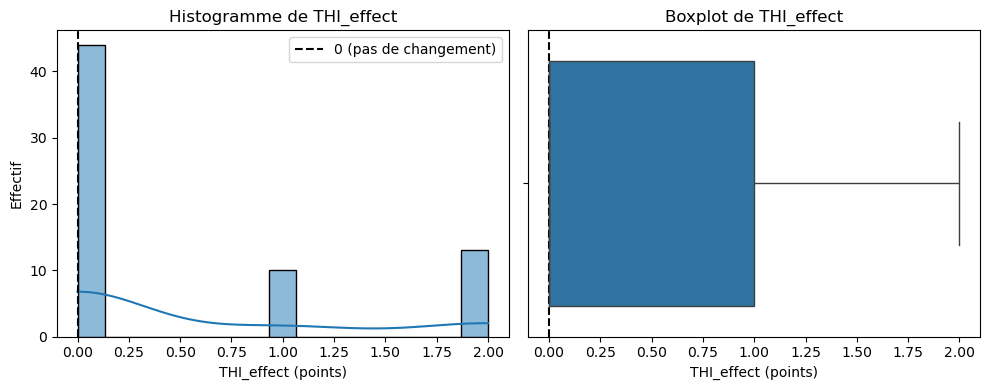


Répartition avec THI_effect < 0 :
  Non-amélioration (0) : 67
  Amélioration     (1) : 0


,patient,therapy,THI_effect,responder_simple
0,P10,G1-Placebo,1.0,0
1,P10,G2-BBT,0.0,0
2,P10,G3-TRT,0.0,0
3,P10,G4-EAE,2.0,0
4,P10,G5-ADT,0.0,0
5,P11,G1-Placebo,0.0,0
7,P11,G3-TRT,0.0,0
8,P11,G4-EAE,2.0,0
10,P12,G1-Placebo,2.0,0
11,P12,G2-BBT,0.0,0


In [14]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) STATISTIQUES DESCRIPTIVES DE THI_effect
# ───────────────────────────────────────────────────────────────────────────────

# Calcul des principales statistiques
thi = df_clean["THI_effect"]
desc_stats = thi.describe()
print("Statistiques descriptives de THI_effect :")
print(desc_stats)

# Complément : valeurs minimales, maximales et médiane
min_val = thi.min()
max_val = thi.max()
median_val = thi.median()
print(f"\nMin : {min_val}, Médiane : {median_val}, Max : {max_val}")

# ───────────────────────────────────────────────────────────────────────────────
# 2) VISUALISATIONS DE LA DISTRIBUTION DE THI_effect
# ───────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(10,4))

# Histogramme
plt.subplot(1,2,1)
sns.histplot(thi, bins=15, kde=True)
plt.axvline(0, color='k', linestyle='--', label='0 (pas de changement)')
plt.title("Histogramme de THI_effect")
plt.xlabel("THI_effect (points)")
plt.ylabel("Effectif")
plt.legend()

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=thi, orient='h')
plt.axvline(0, color='k', linestyle='--')
plt.title("Boxplot de THI_effect")
plt.xlabel("THI_effect (points)")

plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 3) COMPTAGE DES SUJETS AYANT UNE AMÉLIORATION (THI_effect < 0)
# ───────────────────────────────────────────────────────────────────────────────

# On définit “responder_simple” = 1 si THI_effect < 0, sinon 0
df_clean["responder_simple"] = (df_clean["THI_effect"] < 0).astype(int)
counts_simple = df_clean["responder_simple"].value_counts().sort_index()

print("\nRépartition avec THI_effect < 0 :")
print(f"  Non-amélioration (0) : {counts_simple.get(0, 0)}")
print(f"  Amélioration     (1) : {counts_simple.get(1, 0)}")

# Afficher un extrait pour confirmer
display(df_clean[["patient", "therapy", "THI_effect", "responder_simple"]].head(10))

## Bloc 6 : Redéfinition de responder et exploration des variables cliniques par groupe de thérapie
Description :

Recalculer une nouvelle colonne responder_v2 où la condition est THI_effect > 0.

Vérifier la répartition “améliorés” vs “non-améliorés” dans l’échantillon.

Visualiser (boxplots) la distribution de plusieurs variables cliniques — Age, HL-D, HL-I, THI_baseline, HAD_S, HAD_A — séparément pour chaque groupe de thérapie (therapy).

Cela permet de voir s’il y a, a priori, des différences initiales entre les thérapies (par exemple, un groupe de thérapie avait-il un THI_baseline plus élevé) ou des différences de profils auditifs/cliniques.

Répartition responders (THI_effect > 0) vs non-responders (THI_effect = 0) :
  Non-améliorés (0) : 44
  Améliorés    (1) : 23


C:\Users\melon\AppData\Local\Temp\ipykernel_28916\54145131.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


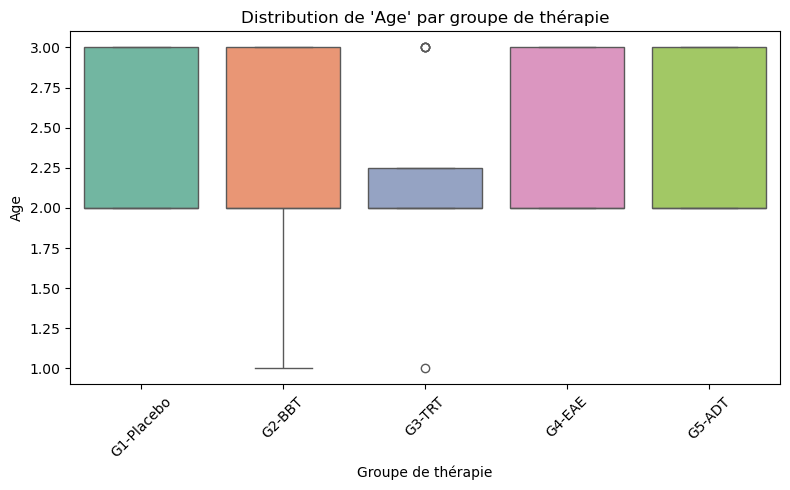

C:\Users\melon\AppData\Local\Temp\ipykernel_28916\54145131.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


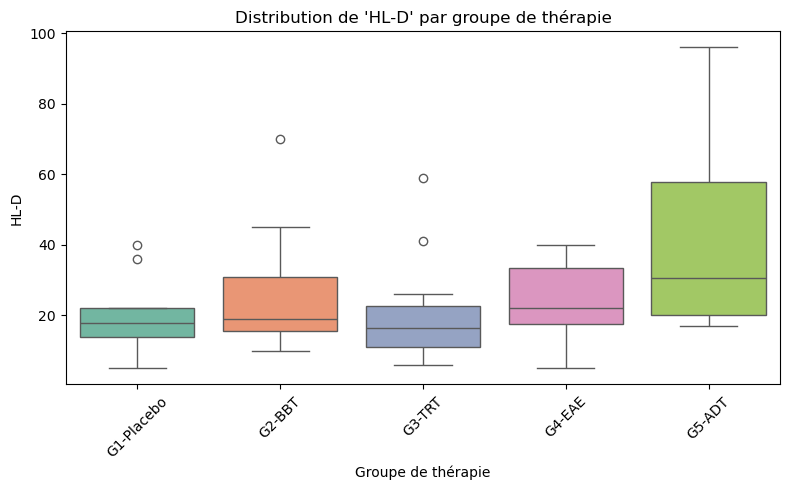

C:\Users\melon\AppData\Local\Temp\ipykernel_28916\54145131.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


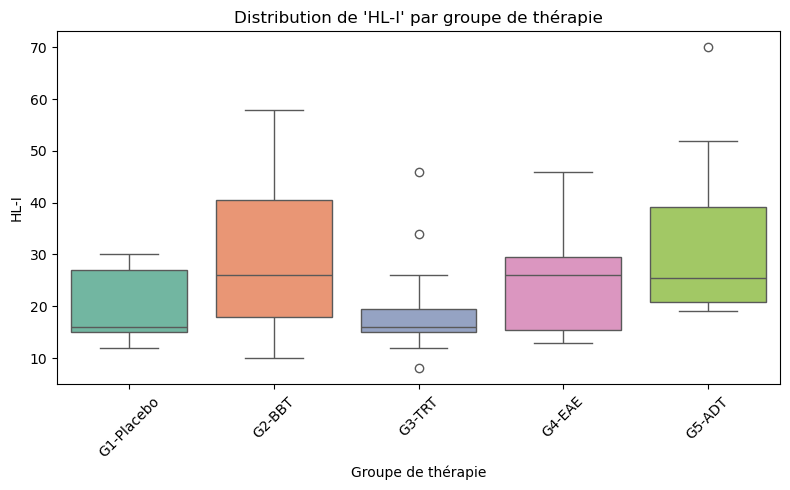

C:\Users\melon\AppData\Local\Temp\ipykernel_28916\54145131.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


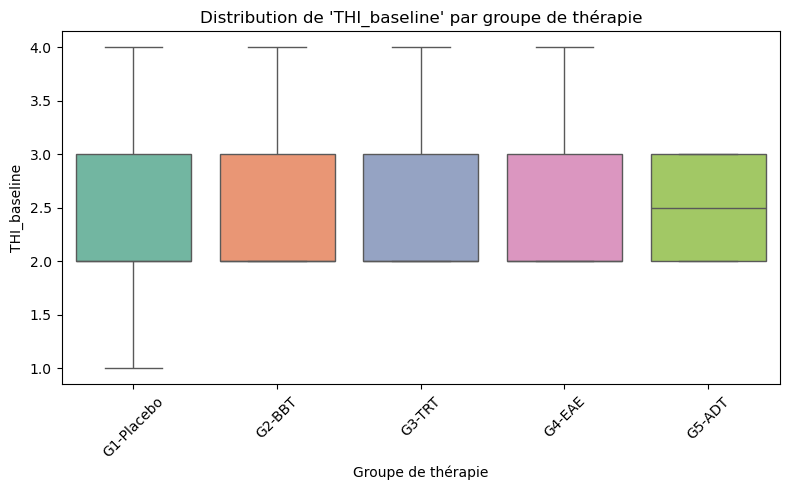

C:\Users\melon\AppData\Local\Temp\ipykernel_28916\54145131.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


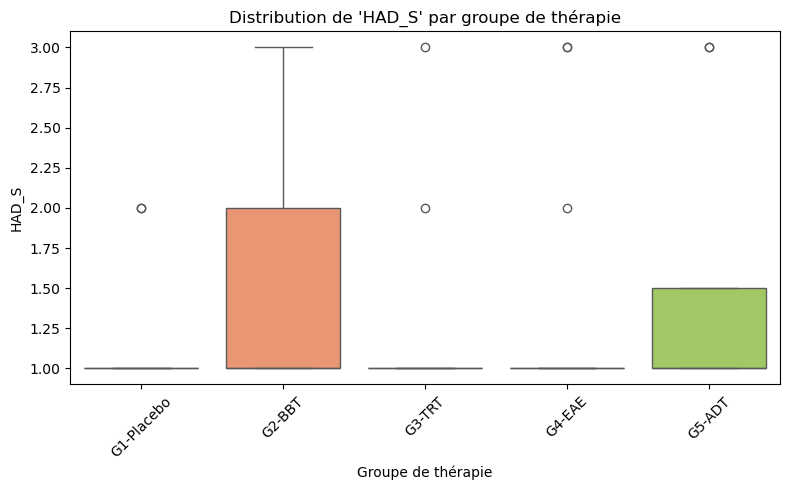

C:\Users\melon\AppData\Local\Temp\ipykernel_28916\54145131.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


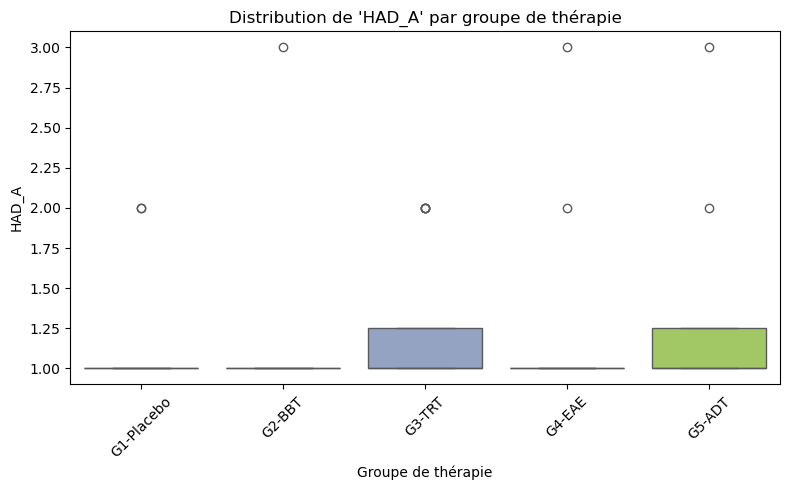

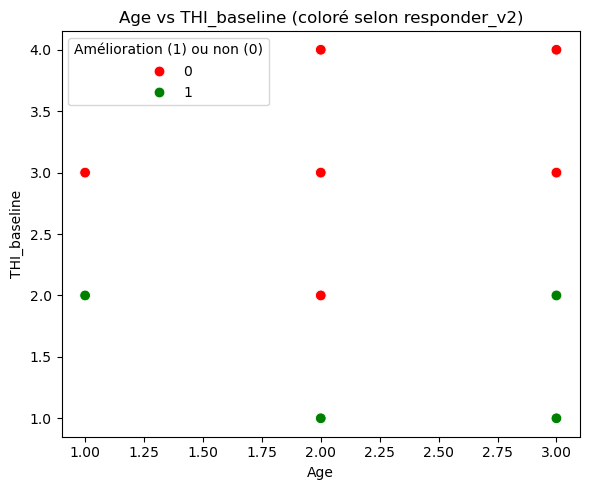

In [15]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) REDÉFINITION DE “responder_v2”
# ───────────────────────────────────────────────────────────────────────────────

# Créer ‘responder_v2’ = 1 si THI_effect > 0, sinon 0
df_clean["responder_v2"] = (df_clean["THI_effect"] > 0).astype(int)

# Répartition dans le DataFrame nettoyé
counts_v2 = df_clean["responder_v2"].value_counts().sort_index()
print("Répartition responders (THI_effect > 0) vs non-responders (THI_effect = 0) :")
print(f"  Non-améliorés (0) : {counts_v2.get(0,0)}")
print(f"  Améliorés    (1) : {counts_v2.get(1,0)}")

# ───────────────────────────────────────────────────────────────────────────────
# 2) VISUALISATION DES VARIABLES CLINIQUES PAR GROUPE DE THÉRAPIE
# ───────────────────────────────────────────────────────────────────────────────

# Liste des variables cliniques à examiner
variables_cliniques = ["Age", "HL-D", "HL-I", "THI_baseline", "HAD_S", "HAD_A"]

# Définir la palette de couleurs pour les 5 thérapies
palette_therapie = sns.color_palette("Set2", n_colors=len(df_clean["therapy"].unique()))

# Boucle pour générer un boxplot par variable (figures séparées)
for var in variables_cliniques:
    plt.figure(figsize=(8,5))
    sns.boxplot(
        x="therapy",
        y=var,
        data=df_clean,
        palette=palette_therapie,
        order=sorted(df_clean["therapy"].unique())
    )
    plt.title(f"Distribution de '{var}' par groupe de thérapie")
    plt.xlabel("Groupe de thérapie")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 3) OPTIONNEL : JOINDRE LA variable “responder_v2” AU BOXPLOT (COLOR HUE)
# ───────────────────────────────────────────────────────────────────────────────

# Exemples de scatterplots Age vs THI_baseline, colorés selon responder_v2, 
# pour voir s’il y a un profil différentiel :
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="Age",
    y="THI_baseline",
    hue="responder_v2",
    data=df_clean,
    palette={0: "red", 1: "green"},
    s=60
)
plt.title("Age vs THI_baseline (coloré selon responder_v2)")
plt.xlabel("Age")
plt.ylabel("THI_baseline")
plt.legend(title="Amélioration (1) ou non (0)")
plt.tight_layout()
plt.show()


## Bloc 7 : Analyse des band-powers EEG (par bande et par électrode)

**Description :**  
Dans ce bloc, nous allons extraire les colonnes correspondant aux band-powers pour chaque bande (δ, θ, α, β, γ) et pour chaque électrode. Nous allons ensuite :

1. **Calculer la puissance moyenne globale par bande** (moyenne sur toutes les électrodes) pour chaque patient.
2. **Visualiser la distribution de cette puissance globale par bande** (histogrammes + boxplots) pour l’ensemble des patients.
3. **Comparer la puissance globale par bande entre “améliorés” (`responder_v2 = 1`) et “non-améliorés” (`responder_v2 = 0`)** à l’aide de boxplots côte à côte, et réaliser un test statistique (Mann–Whitney U) pour chaque bande.
4. **Visualiser, pour chaque électrode, la distribution des band-powers** (par bande) afin de repérer d’éventuelles électrodes aberrantes ou des variations particulières.
5. **Comparer, pour certaines électrodes clés**, la distribution “améliorés” vs “non-améliorés” si pertinent (par exemple pour Fp1, Cz, O2, etc.).

À l’issue de ce bloc, nous repèrerons :
- Les bandes où les patients “améliorés” ont une distribution de puissance significativement différente de celle des “non-améliorés”.
- Les électrodes qui pourraient le plus discriminer les deux groupes.

Bande 'delta' : 19 colonnes (ex. ['delta_bp_FP1', 'delta_bp_FP2', 'delta_bp_F7'])
Bande 'theta' : 19 colonnes (ex. ['theta_bp_FP1', 'theta_bp_FP2', 'theta_bp_F7'])
Bande 'alpha' : 19 colonnes (ex. ['alpha_bp_FP1', 'alpha_bp_FP2', 'alpha_bp_F7'])
Bande 'beta' : 19 colonnes (ex. ['beta_bp_FP1', 'beta_bp_FP2', 'beta_bp_F7'])
Bande 'gamma' : 19 colonnes (ex. ['gamma_bp_FP1', 'gamma_bp_FP2', 'gamma_bp_F7'])
Nombre total de colonnes EEG : 95


,delta_global,theta_global,alpha_global,beta_global,gamma_global
0,5.879742e-11,5.668946e-12,2.908429e-12,6.754158e-13,3.126024e-13
1,7.881082e-09,9.629157e-11,1.126551e-11,1.539183e-12,5.599740e-13
2,4.038550e-10,1.134661e-11,4.445180e-12,1.000058e-12,2.015771e-13
3,9.996765e-12,1.567962e-12,1.827341e-12,3.600595e-13,2.000141e-13
4,1.649182e-08,5.034948e-09,2.038740e-09,5.743507e-10,3.076266e-10


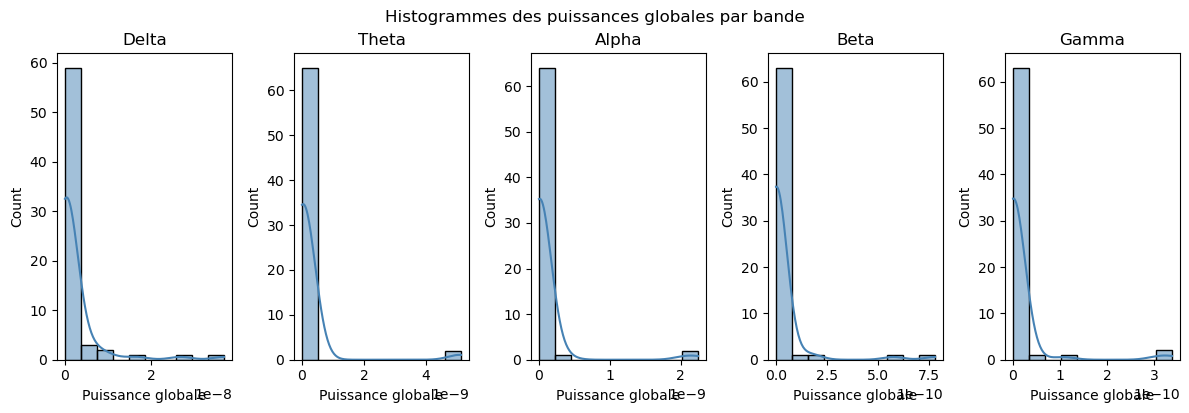

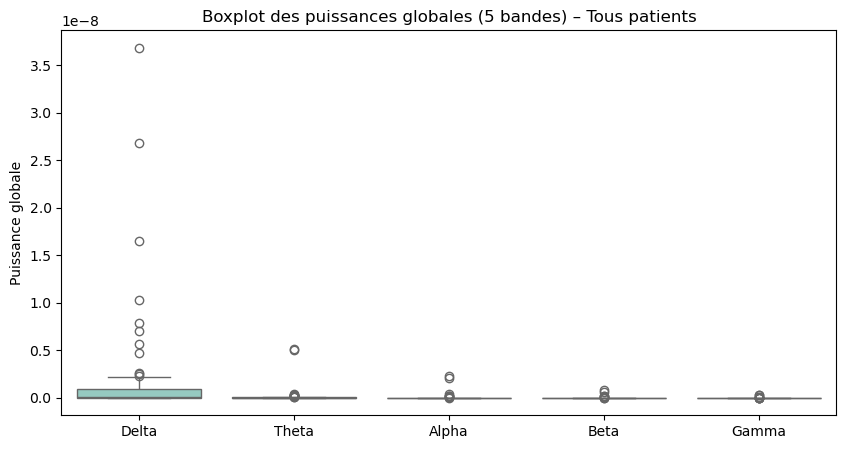

C:\Users\melon\AppData\Local\Temp\ipykernel_28916\3460167518.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\melon\AppData\Local\Temp\ipykernel_28916\3460167518.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\melon\AppData\Local\Temp\ipykernel_28916\3460167518.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\melon\AppData\Local\Temp\ipykernel_28916\3460167518.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

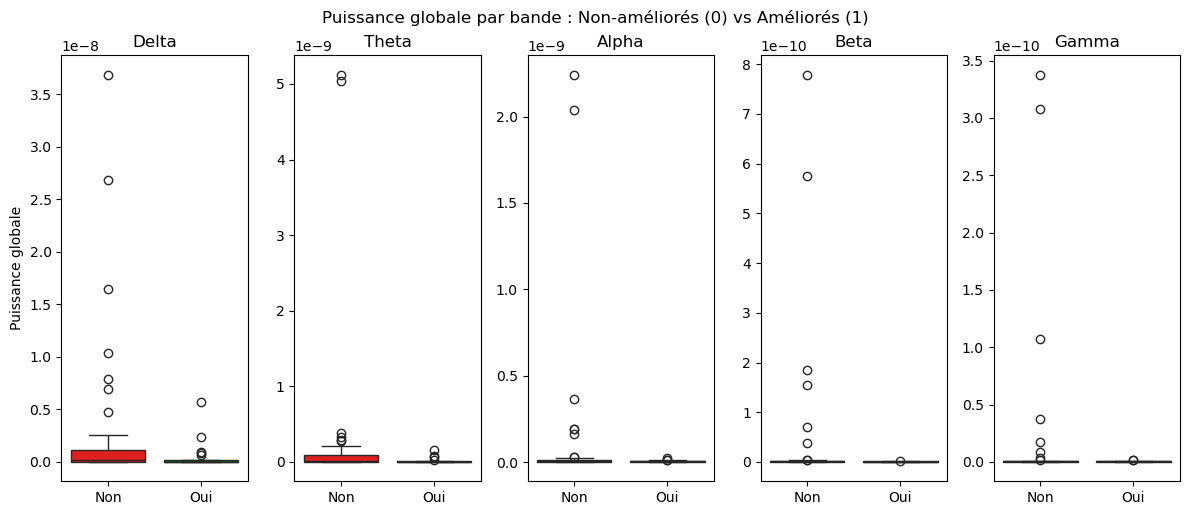

Résultats des tests Mann–Whitney U (Non vs Améliorés) :
  Delta : U = 607.0, p-value = 1.845e-01
  Theta : U = 616.0, p-value = 1.482e-01
  Alpha : U = 637.0, p-value = 8.484e-02
   Beta : U = 596.0, p-value = 2.373e-01
  Gamma : U = 518.0, p-value = 8.793e-01


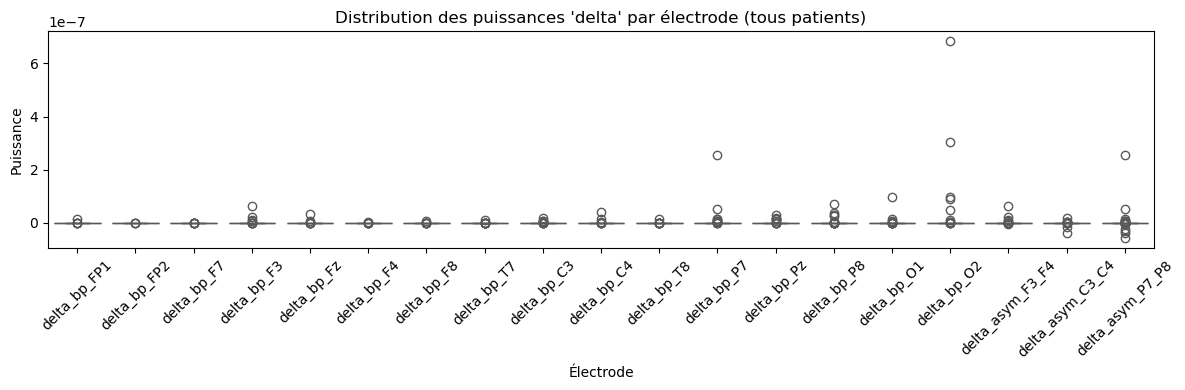

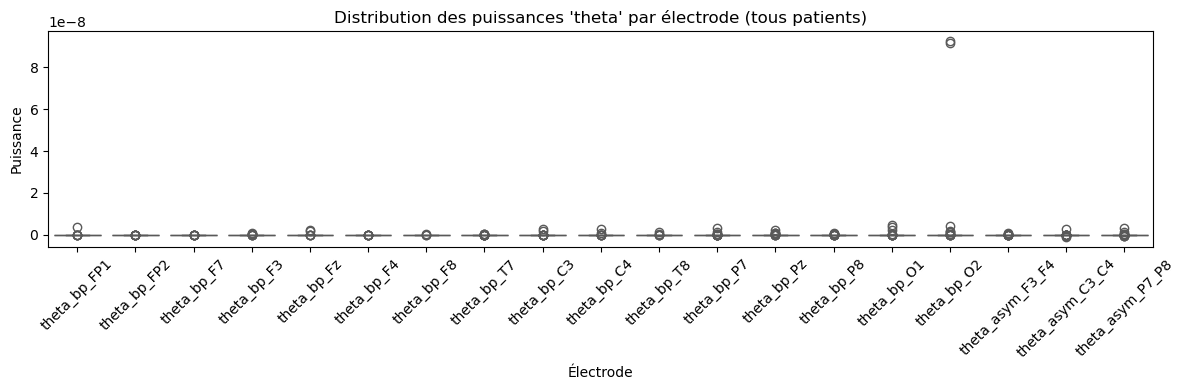

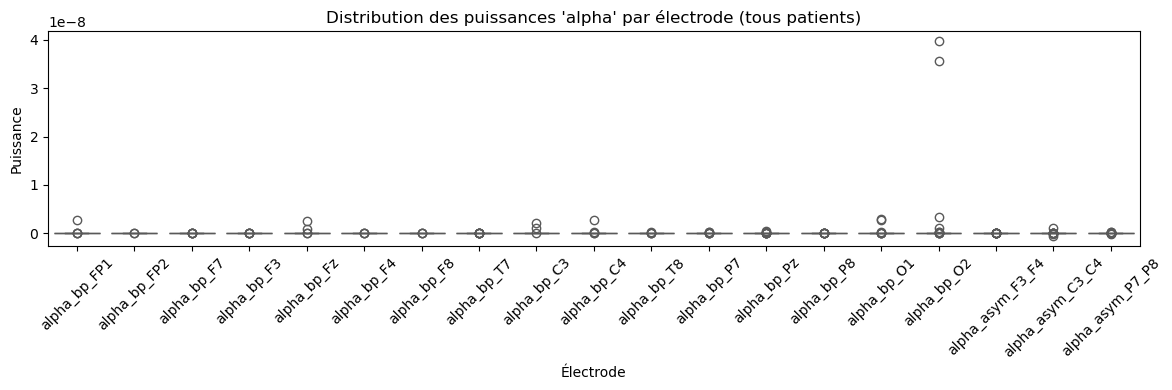

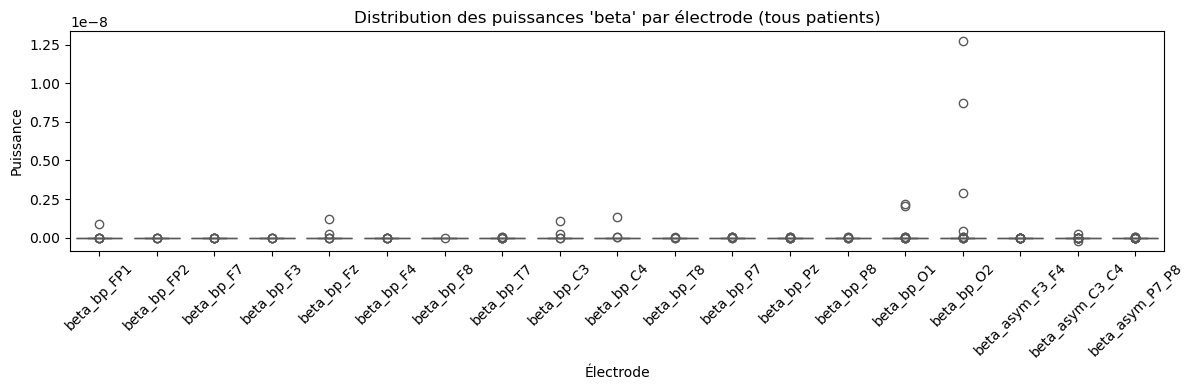

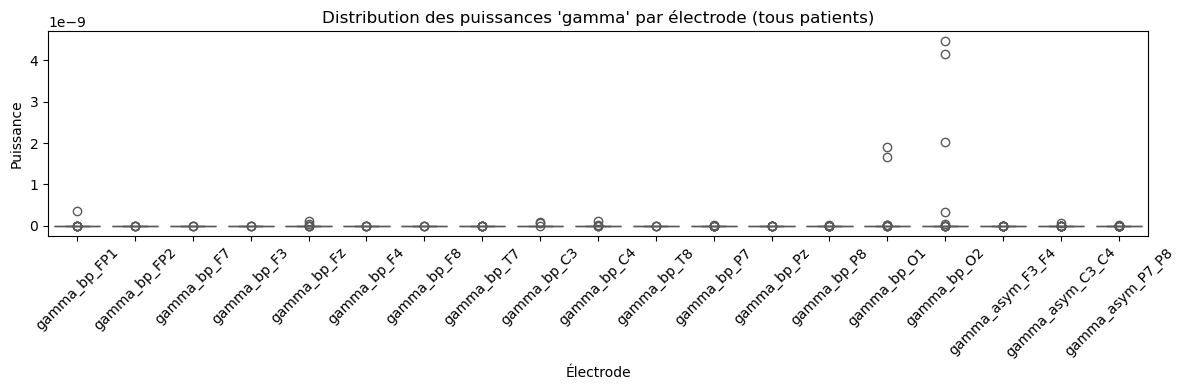

⚠️ Colonne manquante : 'delta_Fp1' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'delta_Fp2' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'delta_Fz' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'delta_Cz' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'delta_Pz' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'delta_O1' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'delta_O2' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'theta_Fp1' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'theta_Fp2' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'theta_Fz' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'theta_Cz' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'theta_Pz' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'theta_O1' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'theta_O2' (électrode/cléf) non présente.
⚠️ Colonne manquante : 'alpha_Fp1' (électrode/cléf) non présente.
⚠️ Colonne manquante

In [16]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) DÉTECTION DES COLONNES EEG (band-powers) PAR BANDE
# ───────────────────────────────────────────────────────────────────────────────

# Réutilisation de df_clean issu du bloc précédent
band_labels = ["delta", "theta", "alpha", "beta", "gamma"]
eeg_cols_by_band = {
    band: [col for col in df_clean.columns if col.startswith(f"{band}_")] 
    for band in band_labels
}
for band, cols in eeg_cols_by_band.items():
    print(f"Bande '{band}' : {len(cols)} colonnes (ex. {cols[:3]})")
print("Nombre total de colonnes EEG :", sum(len(cols) for cols in eeg_cols_by_band.values()))

# ───────────────────────────────────────────────────────────────────────────────
# 2) CALCUL DE LA PUISSANCE GLOBALE PAR BANDE (moyenne sur les 17 électrodes)
# ───────────────────────────────────────────────────────────────────────────────
for band in band_labels:
    df_clean[f"{band}_global"] = df_clean[eeg_cols_by_band[band]].mean(axis=1)

display(df_clean[[f"{b}_global" for b in band_labels]].head())

# ───────────────────────────────────────────────────────────────────────────────
# 3) VISUALISATION DE LA DISTRIBUTION GLOBALE PAR BANDE (ENSEMBLE DES PATIENTS)
# ───────────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(12, 4))
for i, band in enumerate(band_labels):
    plt.subplot(1, 5, i+1)
    sns.histplot(df_clean[f"{band}_global"], bins=10, kde=True, color="steelblue")
    plt.title(f"{band.capitalize()}")
    plt.xlabel("Puissance globale")
    plt.tight_layout()
plt.suptitle("Histogrammes des puissances globales par bande", y=1.02)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_clean[[f"{b}_global" for b in band_labels]],
    palette="Set3"
)
plt.xticks(ticks=range(len(band_labels)), labels=[b.capitalize() for b in band_labels])
plt.title("Boxplot des puissances globales (5 bandes) – Tous patients")
plt.ylabel("Puissance globale")
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 4) COMPARAISON “AMÉLIORÉS” vs “NON-AMÉLIORÉS” PAR BANDE (Correction palette)
# ───────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(12, 5))
for i, band in enumerate(band_labels):
    plt.subplot(1, 5, i+1)
    # Utilisation d'une liste palette=["red","green"] pour corriger l'erreur
    sns.boxplot(
        x="responder_v2",
        y=f"{band}_global",
        data=df_clean,
        palette=["red", "green"]
    )
    plt.title(f"{band.capitalize()}")
    plt.xlabel("")
    if i == 0:
        plt.ylabel("Puissance globale")
    else:
        plt.ylabel("")
    plt.xticks([0,1], ["Non", "Oui"])
    plt.tight_layout()
plt.suptitle("Puissance globale par bande : Non-améliorés (0) vs Améliorés (1)", y=1.02)
plt.show()

# Test statistique (Mann–Whitney U) pour chaque bande
import scipy.stats as stats
print("Résultats des tests Mann–Whitney U (Non vs Améliorés) :")
for band in band_labels:
    grp0 = df_clean[df_clean["responder_v2"] == 0][f"{band}_global"]
    grp1 = df_clean[df_clean["responder_v2"] == 1][f"{band}_global"]
    stat, pval = stats.mannwhitneyu(grp0, grp1, alternative="two-sided")
    print(f"  {band.capitalize():>5} : U = {stat:.1f}, p-value = {pval:.3e}")

# ───────────────────────────────────────────────────────────────────────────────
# 5) VISUALISATION PAR ÉLECTRODE (EXEMPLE) – DISTRIBUTION PAR BANDE
# ───────────────────────────────────────────────────────────────────────────────
for band in band_labels:
    plt.figure(figsize=(12, 4))
    cols = eeg_cols_by_band[band]
    sns.boxplot(data=df_clean[cols], palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Distribution des puissances '{band}' par électrode (tous patients)")
    plt.ylabel("Puissance")
    plt.xlabel("Électrode")
    plt.tight_layout()
    plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 6) COMPARAISON “AMÉLIORÉS” vs “NON-AMÉLIORÉS” POUR ÉLECTRODES CLÉS
# ───────────────────────────────────────────────────────────────────────────────

# Exemples : Fp1, Fp2, Fz, Cz, Pz, O1, O2
electrodes_cle = ["Fp1", "Fp2", "Fz", "Cz", "Pz", "O1", "O2"]

for band in band_labels:
    for el in electrodes_cle:
        col_name = f"{band}_{el}"
        if col_name in df_clean.columns:
            plt.figure(figsize=(6, 4))
            sns.boxplot(
                x="responder_v2",
                y=col_name,
                data=df_clean,
                palette=["red", "green"]
            )
            plt.title(f"{band.capitalize()}_{el} : Non vs Améliorés")
            plt.xlabel("Amélioration (1) ou non (0)")
            plt.ylabel("Puissance")
            plt.tight_layout()
            plt.show()
        else:
            # Si la colonne n'existe pas, on l'indique mais on ne lève pas d'erreur
            print(f"⚠️ Colonne manquante : '{col_name}' (électrode/cléf) non présente.")

## Bloc 8 : Analyse en Composantes Principales (PCA) sur les 95 variables EEG

**Description :**  
Nous allons effectuer les étapes suivantes :
1. Sélectionner les 95 colonnes EEG (`band_bp_*` et `band_asym_*` pour chacune des 5 bandes).  
2. Standardiser (moyenne = 0, écart-type = 1) ces variables.  
3. Appliquer la **PCA** (n_components = 10 pour commencer).  
4. Afficher la **variance expliquée cumulée** par composante (plot).  
5. Créer un petit DataFrame `df_pca` contenant les deux premières composantes (`PC1`, `PC2`) et les colonnes `therapy` et `responder_v2`.  
6. Tracer deux scatterplots :
   - PC1 vs PC2, coloré par **groupe de thérapie** (`therapy`).  
   - PC1 vs PC2, coloré par **responder_v2** (0 vs 1).  


Variance expliquée cumulée par composante :
  PC01 : 0.155
  PC02 : 0.270
  PC03 : 0.372
  PC04 : 0.463
  PC05 : 0.541
  PC06 : 0.607
  PC07 : 0.661
  PC08 : 0.710
  PC09 : 0.757
  PC10 : 0.793


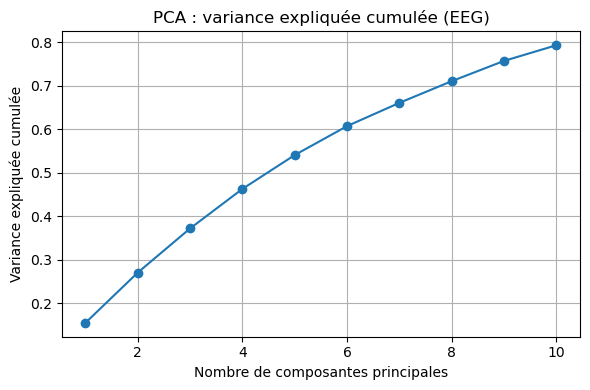

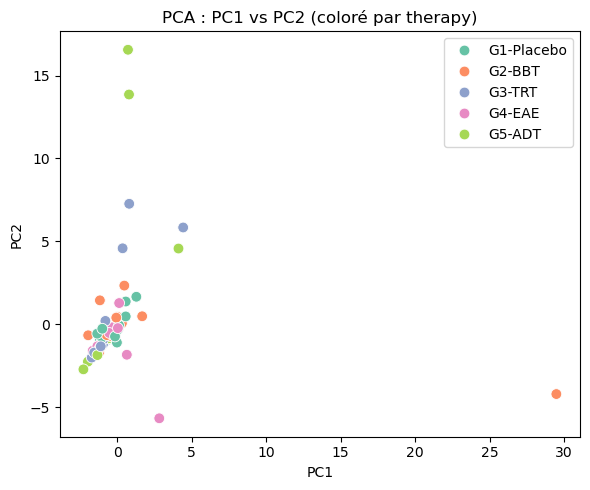

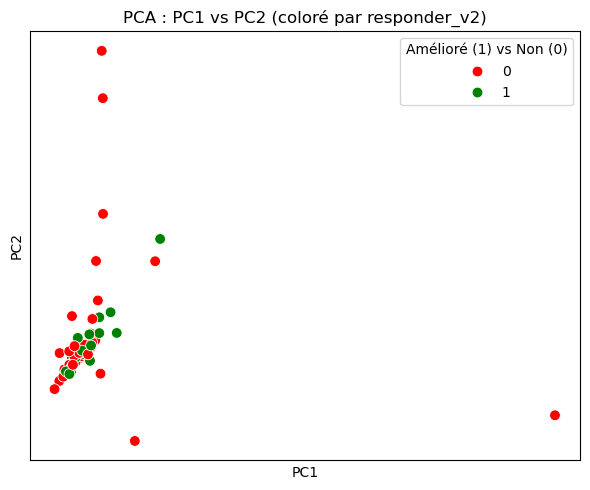

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ───────────────────────────────────────────────────────────────────────────────
# 1) SÉLECTION DES 95 COLONNES EEG
# ───────────────────────────────────────────────────────────────────────────────
eeg_feature_cols = []
for band in band_labels:
    eeg_feature_cols += eeg_cols_by_band[band]
len(eeg_feature_cols)  # Devrait valoir 95

# ───────────────────────────────────────────────────────────────────────────────
# 2) STANDARDISATION DES VARIABLES EEG
# ───────────────────────────────────────────────────────────────────────────────
scaler = StandardScaler()
X_eeg = scaler.fit_transform(df_clean[eeg_feature_cols])

# ───────────────────────────────────────────────────────────────────────────────
# 3) PCA (n_components = 10)
# ───────────────────────────────────────────────────────────────────────────────
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_eeg)

# Variance expliquée cumulée
explained_variance = pca.explained_variance_ratio_.cumsum()
print("Variance expliquée cumulée par composante :")
for i, var in enumerate(explained_variance, 1):
    print(f"  PC{i:02d} : {var:.3f}")

# Plot de la variance expliquée
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("PCA : variance expliquée cumulée (EEG)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 4) CRÉATION DU DATAFRAME POUR VISUALISATION
# ───────────────────────────────────────────────────────────────────────────────
df_pca = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "therapy": df_clean["therapy"].values,
    "responder_v2": df_clean["responder_v2"].values
})

# ───────────────────────────────────────────────────────────────────────────────
# 5) SCATTER PLOTS PC1 vs PC2
# ───────────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="PC1", y="PC2", 
    hue="therapy",
    data=df_pca,
    palette=sns.color_palette("Set2", n_colors=len(df_pca["therapy"].unique())),
    s=60
)
plt.title("PCA : PC1 vs PC2 (coloré par therapy)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="responder_v2",
    data=df_pca,
    palette=["red", "green"],
    s=60
)
plt.title("PCA : PC1 vs PC2 (coloré par responder_v2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xticks([])
plt.yticks([])
plt.legend(title="Amélioré (1) vs Non (0)", loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Bloc 9 : Exploration des “loadings” PCA et visualisation PC2 vs PC3

**Description :**  
1. Extraire les **coefficients (loadings)** de la PCA pour PC1, PC2, PC3.  
2. Identifier les **10 features** (bandes–électrodes) ayant les plus grandes valeurs absolues dans PC1 et dans PC2.  
3. Tracer un **barplot** des “loadings” absolus les plus importants pour PC1 et PC2, afin de voir quelles bandes/électrodes dominent.  
4. Visualiser un scatterplot PC2 vs PC3 coloré par `responder_v2`, pour vérifier si la séparation est meilleure dans cet espace.


Top 10 features (EEG) contribuant à PC1 :
gamma_bp_C4    0.250899
alpha_bp_C4    0.250168
theta_bp_C4    0.249739
beta_bp_C4     0.248206
beta_bp_Fz     0.248087
delta_bp_C4    0.248033
beta_bp_C3     0.246832
delta_bp_Fz    0.246102
alpha_bp_Fz    0.242923
gamma_bp_Fz    0.235490
Name: PC1, dtype: float64

Top 10 features (EEG) contribuant à PC2 :
alpha_bp_O1    0.246693
gamma_bp_O2    0.245775
theta_bp_O2    0.244952
alpha_bp_O2    0.244113
theta_bp_O1    0.243649
beta_bp_O1     0.243412
gamma_bp_O1    0.240922
beta_bp_O2     0.240407
gamma_bp_P8    0.231819
delta_bp_O2    0.226844
Name: PC2, dtype: float64


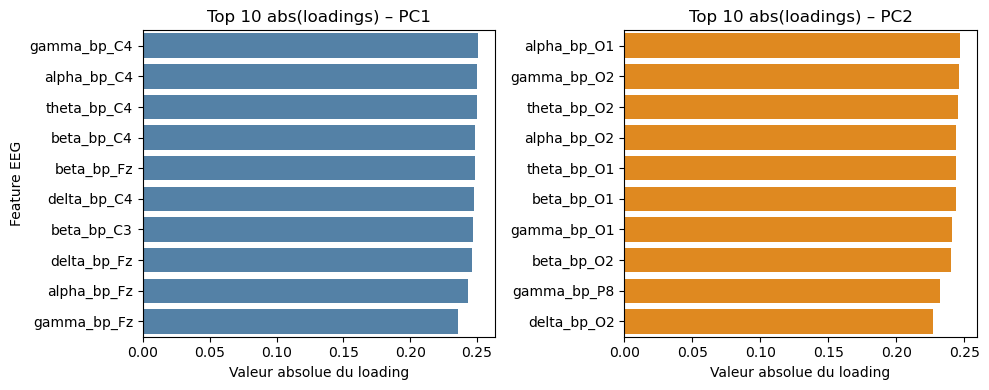

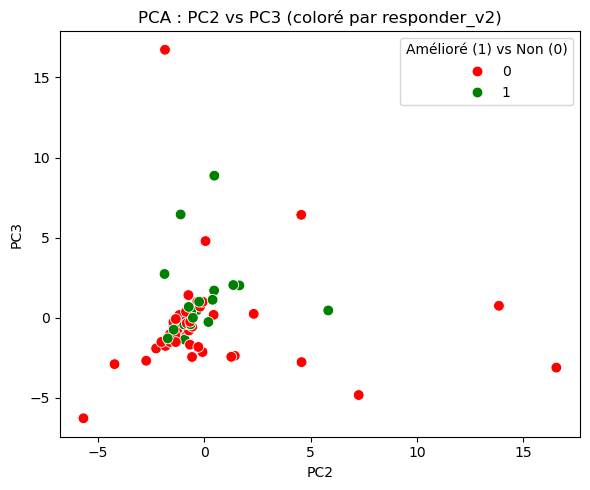

In [18]:
# ───────────────────────────────────────────────────────────────────────────────
# 1) EXTRACTION DES “LOADINGS” DE LA PCA
# ───────────────────────────────────────────────────────────────────────────────

# Rappel : pca.components_ est un array de forme (n_components, n_features)
# Où chaque ligne i contient les coefficients des features pour PC(i+1).

loadings = pd.DataFrame(
    pca.components_[:3, :],           # seules PC1, PC2, PC3
    columns=eeg_feature_cols,
    index=["PC1", "PC2", "PC3"]
)

# 2) IDENTIFIER TOP 10 FEATURES PAR PC (valeurs absolues)
top10_pc1 = loadings.loc["PC1"].abs().sort_values(ascending=False).head(10)
top10_pc2 = loadings.loc["PC2"].abs().sort_values(ascending=False).head(10)

print("Top 10 features (EEG) contribuant à PC1 :")
print(top10_pc1)
print("\nTop 10 features (EEG) contribuant à PC2 :")
print(top10_pc2)

# 3) BARPLOTS DES LOADINGS (ABSOLUS) POUR PC1 ET PC2
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(
    x=top10_pc1.values,
    y=top10_pc1.index,
    color="steelblue"
)
plt.title("Top 10 abs(loadings) – PC1")
plt.xlabel("Valeur absolue du loading")
plt.ylabel("Feature EEG")

plt.subplot(1, 2, 2)
sns.barplot(
    x=top10_pc2.values,
    y=top10_pc2.index,
    color="darkorange"
)
plt.title("Top 10 abs(loadings) – PC2")
plt.xlabel("Valeur absolue du loading")
plt.ylabel("")

plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 4) VISUALISATION PC2 VS PC3 coloré par responder_v2
# ───────────────────────────────────────────────────────────────────────────────

df_pca["PC3"] = X_pca[:, 2]  # ajouter PC3 au DataFrame existant

plt.figure(figsize=(6,5))
sns.scatterplot(
    x="PC2", y="PC3",
    hue="responder_v2",
    data=df_pca,
    palette=["red","green"],
    s=60
)
plt.title("PCA : PC2 vs PC3 (coloré par responder_v2)")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.legend(title="Amélioré (1) vs Non (0)", loc="best", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()